In [1]:
import numpy as np
import pandas as pd
import pickle
import hmmlearn
import matplotlib.pyplot as plt

In [2]:
def essaySummary(X):
    essays = []
    j = 0
    fullLength = len(X)
    for i in range(df.id.nunique()):
        curID = X['id'][j]
        newID = X['id'][j]
        cursorPos = 0
        totalActionTime = 0
        totalTextChange = 0
        totalBackspace = 0
        totalCursorJump = 0
        while (curID == newID):
            totalActionTime = totalActionTime + X['action_time'][j]
            if (X['text_change'][j] != 'NoChange'):
                totalTextChange += 1
            if (X['activity'][j] == 'Remove/Cut'):
                totalBackspace += 1
            if X['cursor_position'][j] != cursorPos and X['cursor_position'][j] != cursorPos + 1:
                totalCursorJump += 1
            cursorPos = X['cursor_position'][j]
            j += 1
            if (j == fullLength):
                break
            newID = X['id'][j]
        EssayLen = X['event_id'][j-1]
        # Format []
        essays.append([curID,totalTextChange/EssayLen,totalActionTime/EssayLen,(X['up_time'][j-1] - totalActionTime)/EssayLen,totalBackspace/EssayLen,totalCursorJump/EssayLen])
    return essays

In [3]:
file_path = 'train_logs.csv'
df = pd.read_csv(file_path)


In [123]:
myHeader = df.head(5)

In [124]:
with open('mytable.tex','w') as tf:
    tf.write(myHeader.to_latex())

C:\Users\Wilson\AppData\Local\Temp\ipykernel_16028\1168234301.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(myHeader.to_latex())


In [122]:
df.head(5)

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


In [115]:
file_path = 'essay_hmm_reult_n_15.csv'
HMM2 = pd.read_csv(file_path)
HMM2.head()

,Unnamed: 0,id,6.0,4.0,0.5,3.5
0,0,1ab08776,-28545.400400,-34252.407921,-21568.127278,-34966.419158
1,1,999246d1,-22087.023301,-27348.206214,-16464.759475,-23887.703708
2,2,af2374f2,-21375.890423,-26456.796080,-14998.976615,-24340.565532
3,3,869a7835,-21823.510791,-32371.456009,-13710.326914,-30668.482804
4,4,6a46d751,-25168.166225,-29659.142198,-19484.914717,-29836.280089


In [3]:
df.down_event.nunique()

131

In [5]:
len(df)

8405898

In [12]:
with open('0.5 model-11845.397847443934.pkl', 'rb') as f:
    data = pickle.load(f)

In [18]:
print(type(data))

<class 'hmmlearn.hmm.CategoricalHMM'>


In [21]:
print(data.sample())

(array([[4]], dtype=int64), array([0]))


### Data Preprocess

In [99]:
mySummary = essaySummary(df)
mySummary2 = pd.DataFrame(mySummary)
mySummary2.columns = ['id', 'PerTextChange','AverageClickTime','AverageBreakTime','PerDelete','PerCursorJump']
mySummary2

,id,PerTextChange,AverageClickTime,AverageBreakTime,PerDelete,PerCursorJump
0,001519c8,0.953070,116.246774,588.473211,0.163082,0.195933
1,0022f953,0.896496,112.221271,616.779951,0.105949,0.150367
2,0042269b,0.957689,101.837766,326.515474,0.106141,0.124275
3,0059420b,0.936375,121.848329,780.766710,0.097044,0.107326
4,0075873a,0.971553,123.943896,532.900040,0.204267,0.215725
...,...,...,...,...,...,...
2466,ffb8c745,0.960118,105.437856,272.626926,0.202574,0.206373
2467,ffbef7e5,0.943164,82.266129,608.660906,0.023041,0.031490
2468,ffccd6fd,0.958864,75.605615,564.081946,0.028730,0.052889
2469,ffec5b38,0.978100,89.277915,376.022517,0.085133,0.089143


### Dataset for just HMM results

In [4]:
file_path = 'essay_hmm_reultA.csv'
HMM4 = pd.read_csv(file_path)
file_path = 'train_scores.csv'
target = pd.read_csv(file_path)
X = pd.merge(HMM4, target, on='id', how='inner')  # 'inner' is the default, you can use 'left', 'right', or 'outer'
#target = X.pop('score')
#X.pop('Unnamed: 0')
#ID = X.pop('id')
#score_half = X.pop('0.5')

In [109]:
file_path = '15-essay_hmm_reultB.csv'
HMM5 = pd.read_csv(file_path)
file_path = 'train_scores.csv'
target = pd.read_csv(file_path)
X = pd.merge(HMM5, target, on='id', how='inner')  # 'inner' is the default, you can use 'left', 'right', or 'outer'
target = X.pop('score')
X.pop('Unnamed: 0')
ID = X.pop('id')
#score_half = X.pop('0.5')

In [118]:
min_noninf_value = X.replace([np.inf, -np.inf], np.nan).min().min()
print(min_noninf_value)
X = X.replace([np.inf, -np.inf], 2 * min_noninf_value)

-4041.038778215268


In [22]:
file_path = 'essay_hmm_reultD.csv'
data = pd.read_csv(file_path)
file_path = 'train_scores.csv'
target = pd.read_csv(file_path)
X = pd.merge(data, target, on='id', how='inner')  # 'inner' is the default, you can use 'left', 'right', or 'outer'
target = X.pop('score')
X.pop('Unnamed: 0')
ID = X.pop('id')

In [158]:
X.head(5)

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0
0,-434.654228,-431.637934,-432.415324,-432.919917,-436.544082,-446.269150,-452.510432,-458.812187,-461.579217,-465.566227,-472.192799,-467.503817
1,-408.419118,-405.279754,-400.198372,-407.253560,-410.855367,-419.864751,-425.341659,-435.501096,-445.744064,-452.212685,-465.512434,-451.556561
2,-400.145858,-396.356013,-400.284350,-395.954806,-404.221735,-418.242258,-426.802729,-438.245249,-445.223265,-454.482173,-467.559722,-461.944776
3,-585.657632,-626.890473,-611.064291,-611.199498,-612.253791,-614.884392,-617.106769,-621.994514,-622.766854,-626.203744,-629.230502,-624.035573
4,-266.514787,-272.800877,-279.616805,-278.963057,-289.256489,-295.309621,-297.461875,-305.678551,-317.365780,-326.289095,-340.023580,-336.517792


In [117]:
file_path = 'essay_hmm_reultC.csv'
HMM5 = pd.read_csv(file_path)
file_path = 'train_scores.csv'
target = pd.read_csv(file_path)
X = pd.merge(HMM5, target, on='id', how='inner')  # 'inner' is the default, you can use 'left', 'right', or 'outer'
target = X.pop('score')
X.pop('Unnamed: 0')
ID = X.pop('id')
#score_half = X.pop('0.5')

In [247]:
np.set_printoptions(threshold=np.inf)

In [40]:
# Find the column with the max value for each row
max_column = X.idxmax(axis=1)


In [41]:
Classification = [float(value) for value in max_column]

In [42]:
Classification = np.array(Classification)

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [265]:
print("Unique Labels in Actual:", set(Classification))
print("Unique Labels in Predicted:", set(target))

Unique Labels in Actual: {0.5, 1.0, 2.0, 3.5, 1.5, 3.0, 6.0, 4.0, 5.5, 4.5, 5.0, 2.5}
Unique Labels in Predicted: {0.5, 1.0, 2.0, 2.5, 1.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0}


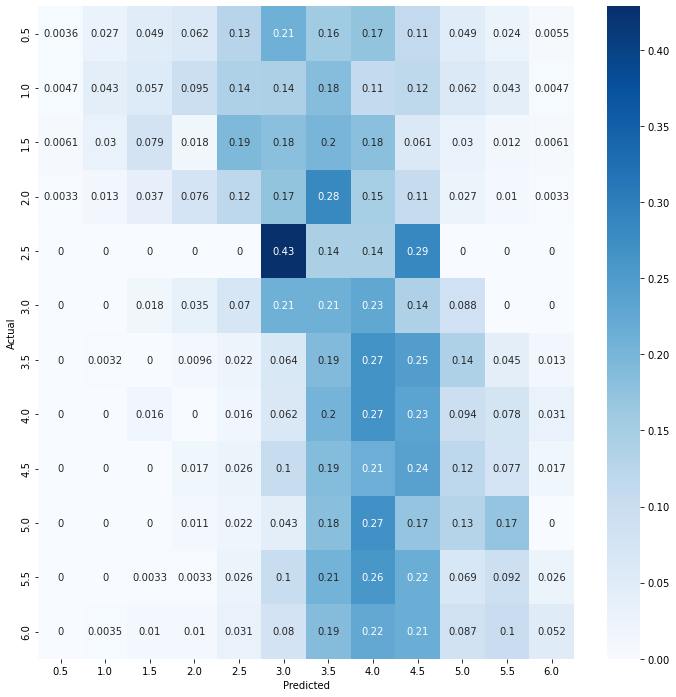

In [288]:
# Create a confusion matrix
label_order = ['0.5','1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0','5.5','6.0']
cm = confusion_matrix(list(map(str, Classification)), list(map(str, target)),normalize='true',labels=label_order)
# Display the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=label_order, yticklabels=label_order)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Data set for just Summary Stats

In [26]:
target = pd.read_csv(file_path)
X = pd.merge(mySummary2, target, on='id', how='inner')  # 'inner' is the default, you can use 'left', 'right', or 'outer'
target = X.pop('score')
ID = X.pop('id')

### Combined Dataset

In [55]:
file_path = 'train_logs.csv'
df = pd.read_csv(file_path)

In [5]:
mySummary = essaySummary(df)
mySummary2 = pd.DataFrame(mySummary)
mySummary2.columns = ['id', 'PerTextChange','AverageClickTime','AverageBreakTime','PerDelete','PerCursorJump']

In [ ]:
file_path = '15-essay_hmm_reultB.csv'
HMM5 = pd.read_csv(file_path)
HMM5.pop('Unnamed: 0')
ID = HMM5.pop('id')
#score_half = X.pop('0.5')
max_column = HMM5.idxmax(axis=1)
Classification = [float(value) for value in max_column]
X = pd.DataFrame()
X['id'] = ID
X['Classification'] = Classification
file_path = 'train_scores.csv'
target = pd.read_csv(file_path)
X = pd.merge(X, target, on='id', how='inner')
X = pd.merge(X, mySummary2, on='id', how='inner')
target = X.pop('score')
ID = X.pop('id')

In [13]:
file_path = 'essay_hmm_reultD.csv'
HMM5 = pd.read_csv(file_path)
HMM5.pop('Unnamed: 0')
ID = HMM5.pop('id')
#score_half = X.pop('0.5')
max_column = HMM5.idxmax(axis=1)
Classification = [float(value) for value in max_column]
X = pd.DataFrame()
X['id'] = ID
X['Classification'] = Classification
file_path = 'train_scores.csv'
target = pd.read_csv(file_path)
X = pd.merge(X, target, on='id', how='inner')
target = X.pop('score')
ID = X.pop('id')

In [17]:
file_path = 'essay_hmm_reultD.csv'
HMM5 = pd.read_csv(file_path)
HMM5.pop('Unnamed: 0')
ID = HMM5.pop('id')
#score_half = X.pop('0.5')
max_column = HMM5.idxmax(axis=1)
Classification = [float(value) for value in max_column]
X = pd.DataFrame()
X['id'] = ID
X['Classification'] = Classification
file_path = 'train_scores.csv'
target = pd.read_csv(file_path)
X = pd.merge(X, target, on='id', how='inner')
X = pd.merge(X, mySummary2, on='id', how='inner')
target = X.pop('score')
ID = X.pop('id')

In [282]:
mse = metrics.mean_squared_error(Classification, target)
print(mse**.5)

2.0518126739269085


In [235]:
print(Classification,target)

[1.0, 1.5, 2.0, 0.5, 0.5, 1.0, 0.5, 1.5, 0.5, 1.0, 0.5, 1.5, 0.5, 0.5, 1.5, 0.5, 3.5, 1.0, 2.0, 0.5, 0.5, 1.0, 1.5, 1.0, 2.0, 1.0, 2.0, 0.5, 6.0, 0.5, 2.0, 0.5, 1.0, 0.5, 0.5, 1.0, 1.0, 1.5, 0.5, 0.5, 1.0, 0.5, 2.0, 2.0, 2.0, 1.0, 0.5, 3.0, 0.5, 0.5, 4.0, 0.5, 0.5, 0.5, 0.5, 1.5, 6.0, 0.5, 2.0, 1.5, 0.5, 0.5, 0.5, 0.5, 1.5, 0.5, 2.0, 1.0, 0.5, 2.0, 1.0, 1.0, 6.0, 2.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.5, 0.5, 0.5, 1.0, 2.0, 0.5, 0.5, 0.5, 1.5, 0.5, 1.5, 1.5, 1.0, 1.0, 1.5, 2.0, 1.0, 5.5, 1.5, 0.5, 1.5, 0.5, 2.0, 1.0, 1.5, 1.5, 1.5, 0.5, 6.0, 2.0, 0.5, 5.5, 0.5, 0.5, 0.5, 4.5, 1.0, 2.0, 0.5, 2.0, 5.0, 4.5, 1.5, 2.0, 0.5, 1.0, 2.0, 0.5, 1.0, 6.0, 0.5, 2.0, 2.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 3.5, 1.0, 2.0, 2.0, 2.0, 0.5, 2.0, 0.5, 6.0, 0.5, 2.0, 1.0, 2.0, 2.0, 1.0, 0.5, 0.5, 1.5, 0.5, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 0.5, 1.0, 0.5, 1.0, 1.5, 0.5, 3.5, 2.0, 0.5, 0.5, 2.0, 2.0, 0.5, 2.0, 6.0, 1.0, 2.0, 0.5, 2.0, 0.5, 1.0, 2.0, 1.0, 0.5, 0.5, 2.0, 0.5, 3.0, 0.5, 1.0, 3.5, 1.0, 1.0, 1.0, 0.5, 2.0, 0.5,

In [28]:
file_path = 'essay_hmm_reultD.csv'
HMM5 = pd.read_csv(file_path)
HMM5.pop('Unnamed: 0')
ID = HMM5.pop('id')

X = HMM5.rank(axis = 1,ascending = True)

X['id'] = ID

file_path = 'train_scores.csv'
target = pd.read_csv(file_path)
X = pd.merge(X, target, on='id', how='inner')
X = pd.merge(X, mySummary2, on='id', how='inner')
target = X.pop('score')
ID = X.pop('id')

In [279]:
HMM5.head(5)

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0
0,-434.654228,-431.637934,-432.415324,-432.919917,-436.544082,-446.269150,-452.510432,-458.812187,-461.579217,-465.566227,-472.192799,-467.503817
1,-408.419118,-405.279754,-400.198372,-407.253560,-410.855367,-419.864751,-425.341659,-435.501096,-445.744064,-452.212685,-465.512434,-451.556561
2,-400.145858,-396.356013,-400.284350,-395.954806,-404.221735,-418.242258,-426.802729,-438.245249,-445.223265,-454.482173,-467.559722,-461.944776
3,-585.657632,-626.890473,-611.064291,-611.199498,-612.253791,-614.884392,-617.106769,-621.994514,-622.766854,-626.203744,-629.230502,-624.035573
4,-266.514787,-272.800877,-279.616805,-278.963057,-289.256489,-295.309621,-297.461875,-305.678551,-317.365780,-326.289095,-340.023580,-336.517792


In [29]:
X.head(5)

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,PerTextChange,AverageClickTime,AverageBreakTime,PerDelete,PerCursorJump
0,9.0,12.0,11.0,10.0,8.0,7.0,6.0,5.0,4.0,3.0,1.0,2.0,0.986438,98.037830,1214.581727,0.066381,0.072091
1,9.0,11.0,12.0,10.0,8.0,7.0,6.0,5.0,4.0,2.0,1.0,3.0,0.974619,86.744743,791.018129,0.094271,0.100798
2,10.0,11.0,9.0,12.0,8.0,7.0,6.0,5.0,4.0,3.0,1.0,2.0,0.970588,88.394243,1038.493116,0.078223,0.089487
3,12.0,2.0,11.0,10.0,9.0,8.0,7.0,6.0,5.0,3.0,1.0,4.0,0.936405,147.221332,756.889835,0.030546,0.039059
4,12.0,11.0,9.0,10.0,8.0,7.0,6.0,5.0,4.0,3.0,1.0,2.0,0.817937,106.436952,755.281187,0.018206,0.018881


In [87]:
file_path = 'train_scores.csv'
target = pd.read_csv(file_path)

In [94]:
target.head(5)

0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
Name: score, dtype: float64

In [84]:
X = pd.DataFrame()
X['ID'] = ID
X['Classification'] = Classification

In [ ]:
file_path = 'train_scores.csv'
target = pd.read_csv(file_path)
X = pd.merge(HMM5, target, on='id', how='inner')  # 'inner' is the default, you can use 'left', 'right', or 'outer'
X = pd.merge(X, mySummary2, on='id', how='inner')
target = X.pop('score')
X.pop('Unnamed: 0')
ID = X.pop('id')
#score_half = X.pop('0.5')
max_column = X.idxmax(axis=1)
Classification = [float(value) for value in max_column]

In [114]:
X.head(5)

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0
0,-8787.239512,-8754.984139,-8816.672032,-8866.738829,-8978.806805,-8887.995734,-8973.007775,-9129.639106,-8878.257770,-9202.267176,-9174.212857,-9132.899475
1,-10994.596150,-11058.514000,-10990.239923,-11080.850168,-11141.312172,-11127.457872,-11296.408413,-11437.141478,-11268.273714,-11382.213668,-11610.723281,-11345.276417
2,-11638.342155,-11802.720913,-11834.080325,-11761.733319,-11875.273131,-11953.054999,-12154.529711,-12393.094659,-12133.948232,-12405.891394,-12474.084121,-12364.347893
3,-12291.695343,-12928.740184,-12731.710060,-12683.267061,-12689.931258,-12564.814116,-12821.903323,-12796.083113,-12846.554688,-12974.704395,-13000.852477,-12937.660532
4,-12018.738184,-193668.123886,-193668.123886,-193668.123886,-193668.123886,-193668.123886,-193668.123886,-193668.123886,-193668.123886,-193668.123886,-193668.123886,-193668.123886


### Data Visualization

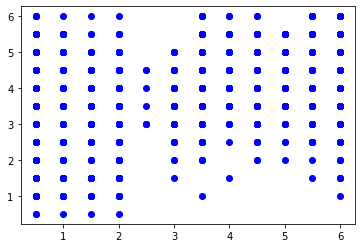

In [151]:
plt.scatter(Classification, target, color='blue')

In [276]:
plt.scatter(X['4.0'], target, color='blue')

KeyError: '4.0'

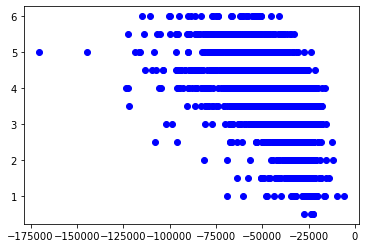

In [119]:
plt.scatter(X['3.5'], target, color='blue')

In [7]:
nan_count = X.isna().sum()

# Count infinity values in each column
inf_count = X.isin([np.inf, -np.inf]).sum()

# Print the counts
print("NaN count per column:")
print(nan_count)

print("\nInfinity count per column:")
print(inf_count)


NaN count per column:
Classification    0
dtype: int64

Infinity count per column:
Classification    0
dtype: int64


### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [28]:
Classification = np.array(Classification)

In [33]:
Classification = Classification.reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

df = pd.DataFrame(data)

# Creating interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X)

# Combine the original features and interaction terms
X_combined = np.concatenate([X.values, X_interactions], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, target, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients
print('Coefficients:', model.coef_)


NameError: name 'data' is not defined

Root Mean Squared Error: 0.7171016963639788
R^2 Score: 0.4679464384679577


Text(0, 0.5, 'predictions')

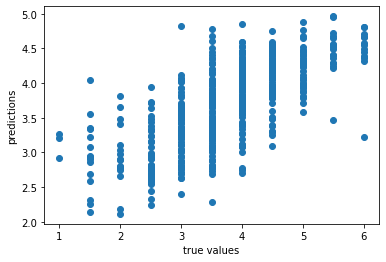

In [30]:
# Generating synthetic data for demonstration purposes
#X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {mse**.5}")
print(f"R^2 Score: {r2}")

yhat = y_pred
plt.scatter(y_test, yhat)
plt.xlabel('true values')
plt.ylabel('predictions')

#plt.scatter(X_test, y_test, color='blue')
#plt.plot(X_test, y_pred, color='red', linewidth=2)
#plt.title('Linear Regression')
#plt.xlabel('X')
#plt.ylabel('y')
#plt.show()


In [31]:
X.head()

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,PerTextChange,AverageClickTime,AverageBreakTime,PerDelete,PerCursorJump
0,9.0,12.0,11.0,10.0,8.0,7.0,6.0,5.0,4.0,3.0,1.0,2.0,0.986438,98.037830,1214.581727,0.066381,0.072091
1,9.0,11.0,12.0,10.0,8.0,7.0,6.0,5.0,4.0,2.0,1.0,3.0,0.974619,86.744743,791.018129,0.094271,0.100798
2,10.0,11.0,9.0,12.0,8.0,7.0,6.0,5.0,4.0,3.0,1.0,2.0,0.970588,88.394243,1038.493116,0.078223,0.089487
3,12.0,2.0,11.0,10.0,9.0,8.0,7.0,6.0,5.0,3.0,1.0,4.0,0.936405,147.221332,756.889835,0.030546,0.039059
4,12.0,11.0,9.0,10.0,8.0,7.0,6.0,5.0,4.0,3.0,1.0,2.0,0.817937,106.436952,755.281187,0.018206,0.018881


In [166]:
from sklearn.preprocessing import PolynomialFeatures

In [161]:
# Generating synthetic data for demonstration purposes
#X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [173]:
# Create interaction terms (interaction of each regressor pair + polynomial)
#Interaction terms need to be created in both the test and train datasets
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
interaction
#traning
X_inter = pd.DataFrame(interaction.fit_transform(X_train))
X_inter.head(3)

#test
X_inter_t = pd.DataFrame(interaction.fit_transform(X_test))
X_inter_t.head(3)

#######################
#create the alternate for dropping all interaction terms Except the first one (the 13th variable in this case)
#This will be used in a loop where the 13th item will be replaced by the 14th, 15th...104th

#train X
X_inter_alt = X_inter.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
print(X_inter_alt.head(3))
print('')
print('')
print('')

#test X
X_inter_t_alt = X_inter_t.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
X_inter_t_alt.head()

#######################

#Since X_inter is used in regression, the index of the that dataset and the outcome variable must be the same
#The index of X_inter was reset during the computation
#Reset the index of Y manually as well
y_inter=y_train.reset_index()
y_inter=y_inter.drop(['index'], axis=1)
print(y_inter.head(3))

           0           1           2           3           4           5   \
0 -473.948112 -428.998868 -426.230982 -427.677697 -429.517639 -420.351158   
1 -423.615697 -407.952839 -409.529212 -407.288457 -407.019791 -395.635825   
2 -466.273382 -421.367953 -420.746214 -422.662544 -423.382706 -405.256073   

           6           7           8           9           10          11  
0 -420.079174 -421.581947 -422.423135 -423.433478 -426.200140 -423.093855  
1 -390.473343 -388.416884 -386.592725 -385.526500 -386.304525 -385.170486  
2 -401.758463 -400.530318 -400.876021 -399.675999 -399.783322 -399.819204  



   score
0    4.0
1    4.0
2    5.5


In [172]:
X.head(5)

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0
0,-434.654228,-431.637934,-432.415324,-432.919917,-436.544082,-446.269150,-452.510432,-458.812187,-461.579217,-465.566227,-472.192799,-467.503817
1,-408.419118,-405.279754,-400.198372,-407.253560,-410.855367,-419.864751,-425.341659,-435.501096,-445.744064,-452.212685,-465.512434,-451.556561
2,-400.145858,-396.356013,-400.284350,-395.954806,-404.221735,-418.242258,-426.802729,-438.245249,-445.223265,-454.482173,-467.559722,-461.944776
3,-585.657632,-626.890473,-611.064291,-611.199498,-612.253791,-614.884392,-617.106769,-621.994514,-622.766854,-626.203744,-629.230502,-624.035573
4,-266.514787,-272.800877,-279.616805,-278.963057,-289.256489,-295.309621,-297.461875,-305.678551,-317.365780,-326.289095,-340.023580,-336.517792


In [11]:
import statsmodels.api as sm

# Fit the linear regression model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Print the regression summary, including p-values
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     314.9
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.76e-65
Time:                        07:23:28   Log-Likelihood:                -2725.1
No. Observations:                1976   AIC:                             5454.
Df Residuals:                    1974   BIC:                             5465.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1406      0.038     81.

### MLP

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout

In [32]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Standardize the data (optional but recommended for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an MLP model
model = Sequential()
#model.add(Dense(units=12, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.1))
#model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))

# Compile the model
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set



Epoch 1/300
62/62 [==============================] - 1s 4ms/step - loss: 5.7768 - val_loss: 3.8545
Epoch 2/300
62/62 [==============================] - 0s 2ms/step - loss: 4.2704 - val_loss: 2.4135
Epoch 3/300
62/62 [==============================] - 0s 2ms/step - loss: 3.1725 - val_loss: 1.8024
Epoch 4/300
62/62 [==============================] - 0s 2ms/step - loss: 2.8882 - val_loss: 1.5470
Epoch 5/300
62/62 [==============================] - 0s 2ms/step - loss: 2.5961 - val_loss: 1.4000
Epoch 6/300
62/62 [==============================] - 0s 2ms/step - loss: 2.5082 - val_loss: 1.2668
Epoch 7/300
62/62 [==============================] - 0s 2ms/step - loss: 2.2660 - val_loss: 1.2072
Epoch 8/300
62/62 [==============================] - 0s 2ms/step - loss: 2.2308 - val_loss: 1.1182
Epoch 9/300
62/62 [==============================] - 0s 2ms/step - loss: 2.1311 - val_loss: 1.0493
Epoch 10/300
62/62 [==============================] - 0s 3ms/step - loss: 2.0263 - val_loss: 0.9903
Epoch 11/

62/62 [==============================] - 0s 2ms/step - loss: 0.7151 - val_loss: 0.5144
Epoch 84/300
62/62 [==============================] - 0s 2ms/step - loss: 0.7170 - val_loss: 0.5002
Epoch 85/300
62/62 [==============================] - 0s 2ms/step - loss: 0.7363 - val_loss: 0.5045
Epoch 86/300
62/62 [==============================] - 0s 2ms/step - loss: 0.7126 - val_loss: 0.5047
Epoch 87/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6986 - val_loss: 0.5057
Epoch 88/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6748 - val_loss: 0.5050
Epoch 89/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6807 - val_loss: 0.5016
Epoch 90/300
62/62 [==============================] - 0s 2ms/step - loss: 0.7645 - val_loss: 0.5050
Epoch 91/300
62/62 [==============================] - 0s 2ms/step - loss: 0.7175 - val_loss: 0.5049
Epoch 92/300
62/62 [==============================] - 0s 2ms/step - loss: 0.7051 - val_loss: 0.5025
Epoch 93/300


62/62 [==============================] - 0s 2ms/step - loss: 0.6359 - val_loss: 0.4976
Epoch 165/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6480 - val_loss: 0.5022
Epoch 166/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6292 - val_loss: 0.4904
Epoch 167/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6424 - val_loss: 0.4943
Epoch 168/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6582 - val_loss: 0.5007
Epoch 169/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6306 - val_loss: 0.4923
Epoch 170/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6321 - val_loss: 0.4999
Epoch 171/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6567 - val_loss: 0.4983
Epoch 172/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6332 - val_loss: 0.4999
Epoch 173/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6595 - val_loss: 0.4952
Epoc

62/62 [==============================] - 0s 2ms/step - loss: 0.6397 - val_loss: 0.5010
Epoch 246/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6220 - val_loss: 0.4956
Epoch 247/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6408 - val_loss: 0.5000
Epoch 248/300
62/62 [==============================] - 0s 1ms/step - loss: 0.6254 - val_loss: 0.5010
Epoch 249/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6387 - val_loss: 0.5038
Epoch 250/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6478 - val_loss: 0.4973
Epoch 251/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6390 - val_loss: 0.5003
Epoch 252/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6372 - val_loss: 0.5096
Epoch 253/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6437 - val_loss: 0.4959
Epoch 254/300
62/62 [==============================] - 0s 2ms/step - loss: 0.6548 - val_loss: 0.5033
Epoc

16/16 [==============================] - 0s 867us/step - loss: 0.4992
test RMSE =  0.7065132730672097
62/62 [==============================] - 0s 754us/step - loss: 0.5519
train RMSE =  0.7428929640247423
16/16 [==============================] - 0s 734us/step


Text(0, 0.5, 'predictions')

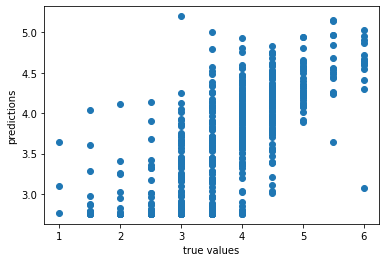

In [33]:
test_result = model.evaluate(X_test, y_test)
print('test RMSE = ' , test_result**.5)

train_result = model.evaluate(X_train, y_train)
print('train RMSE = ' , train_result**.5)
yhat = model.predict(X_test)
plt.scatter(y_test, yhat)
plt.xlabel('true values')
plt.ylabel('predictions')

### Decision Tree

In [200]:
from sklearn.tree import DecisionTreeRegressor

In [201]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Create a decision tree regressor
regressor = DecisionTreeRegressor(max_depth=5)

# Train the regressor
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print(f'RMSE: {mse**.5}')
print(f'R-squared: {r2}')

RMSE: 0.7385655732603924
R-squared: 0.43561953243200136


### Gaussian Process

In [94]:
import random
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [114]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(X_test, return_std=True,  return_cov=False)
#y_pred2 = gp.sample_y(x, random_state=10)

mse = metrics.mean_squared_error(y_test, y_pred)
print(f'RMSE: {mse**.5}')

RMSE: 2.1417583245070713


In [110]:
print(y_pred[0:5],y_test[0:5])

[0.00000000e+000 0.00000000e+000 0.00000000e+000 8.29300586e-294
 0.00000000e+000] 1058    3.0
2178    3.5
1708    4.0
1550    4.0
353     4.5
Name: score, dtype: float64


In [113]:
# Instantiate a Gaussian Process model
gp2 = GaussianProcessRegressor(kernel=kernel, alpha=1,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp2.fit(X_train, y_train)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred2, sigma2 = gp2.predict(X_test, return_std=True)

mse2 = mean_squared_error(y_test, y_pred2)
print(f'RMSE: {mse2**.5}')

C:\Users\Wilson\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


RMSE: 3.9104584555473796
